In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score



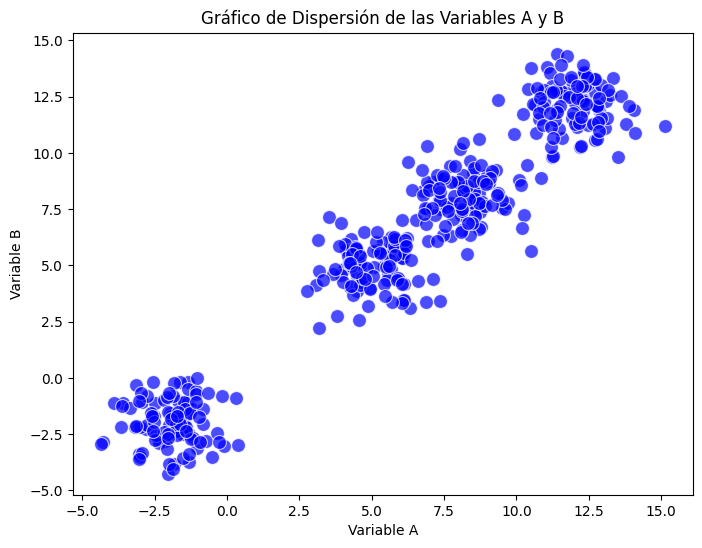

In [3]:
df = pd.read_csv('kmeans1.csv')
df.head()
df2 = pd.read_csv('kmeans2.csv')
df2.head()

mtp.figure(figsize=(8,6))
sns.scatterplot(x=df['A'], y=df['B'], s=100, color='blue', alpha=0.7)

mtp.title('Gráfico de Dispersión de las Variables A y B')
mtp.xlabel('Variable A')
mtp.ylabel('Variable B')
mtp.show()

Centroides:  [[11.83067709 11.95281654]
 [-1.92438992 -1.96702231]
 [ 6.53648362  6.42420157]]


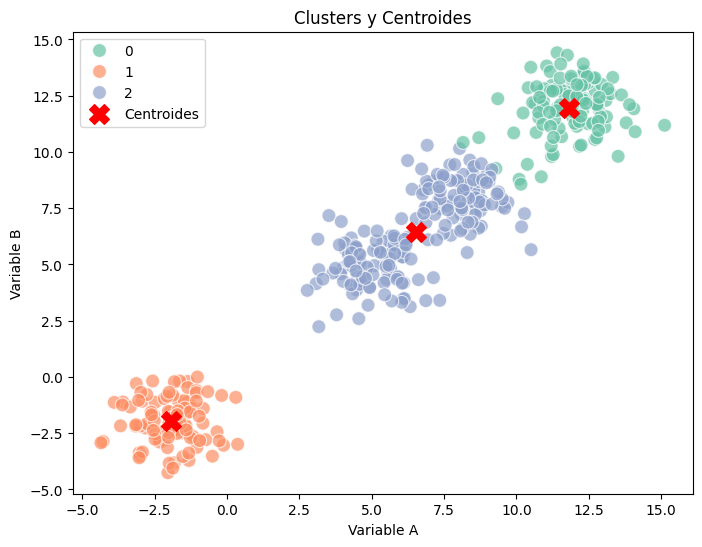

In [4]:
k = 3
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
df['Cluster'] = kmeans.fit_predict(df[['A', 'B']])

centroides = kmeans.cluster_centers_
print("Centroides: ", centroides)

mtp.figure(figsize=(8,6))
sns.scatterplot(x=df['A'], y=df['B'], hue=df['Cluster'], palette='Set2', s=100, alpha=0.7)
mtp.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='X', label='Centroides')
mtp.title('Clusters y Centroides')
mtp.xlabel('Variable A')
mtp.ylabel('Variable B')
mtp.legend()
mtp.show()

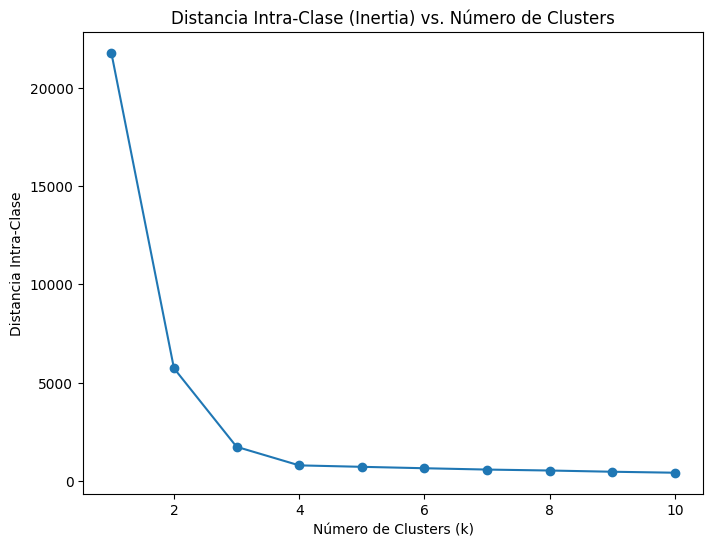

In [5]:
inertia_dict = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    kmeans.fit(df[['A', 'B']])
    inertia_dict[k] = kmeans.inertia_

mtp.figure(figsize=(8,6))
mtp.plot(list(inertia_dict.keys()), list(inertia_dict.values()), marker='o')
mtp.title('Distancia Intra-Clase (Inertia) vs. Número de Clusters')
mtp.xlabel('Número de Clusters (k)')
mtp.ylabel('Distancia Intra-Clase')
mtp.show()

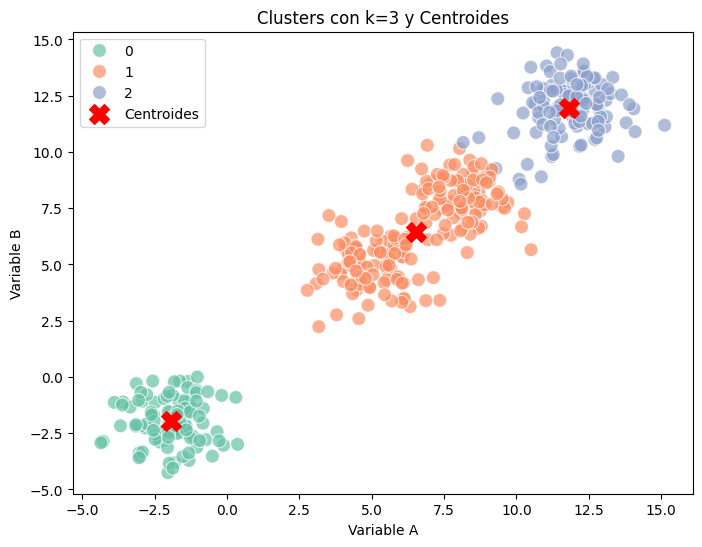

In [6]:
k_optimo = 3
kmeans = KMeans(n_clusters=k_optimo, init='k-means++', n_init=10, max_iter=300)
df['Cluster'] = kmeans.fit_predict(df[['A', 'B']])


centroides = kmeans.cluster_centers_
mtp.figure(figsize=(8,6))
sns.scatterplot(x=df['A'], y=df['B'], hue=df['Cluster'], palette='Set2', s=100, alpha=0.7)
mtp.scatter(centroides[:, 0], centroides[:, 1], c='red', s=200, marker='X', label='Centroides')
mtp.title(f'Clusters con k={k_optimo} y Centroides')
mtp.xlabel('Variable A')
mtp.ylabel('Variable B')
mtp.legend()
mtp.show()

In [7]:
scaler = StandardScaler()
df_escala = scaler.fit_transform(df2)
df_escala = pd.DataFrame(df_escala, columns=df2.columns)
df_escala.head()

def plot_elbow_method(data):
    inertia_values = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    mtp.plot(range(1, 11), inertia_values, marker='o')
    mtp.title('Método del Codo')
    mtp.xlabel('Número de Clusters')
    mtp.ylabel('Inertia')
    mtp.show()

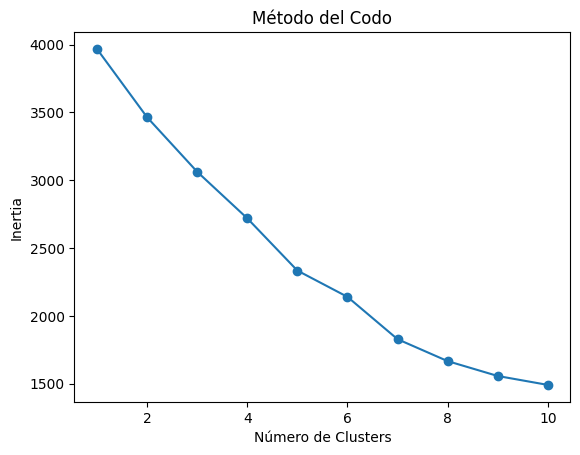

In [8]:
plot_elbow_method(df_escala)

def davies_bouldin(data):
    db_scores = []
    for k in range(2, 11):
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
        kmeans.fit(data)
        db_scores.append(davies_bouldin_score(data, kmeans.labels_))

    mtp.plot(range(2, 11), db_scores, marker='o')
    mtp.title('Índice Davies-Bouldin')
    mtp.xlabel('Número de Clusters')
    mtp.ylabel('Davies-Bouldin')
    mtp.show()

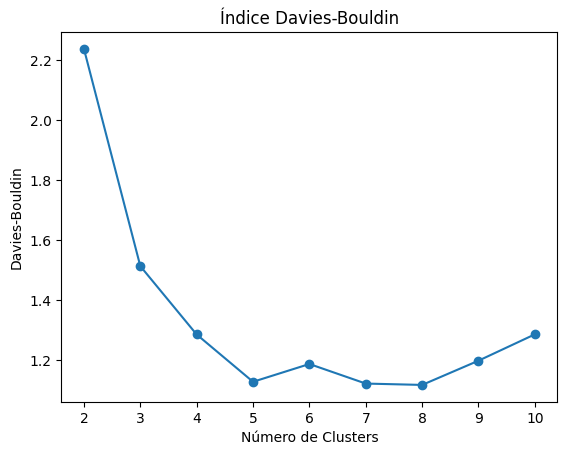

In [9]:
davies_bouldin(df_escala)

def silhouette_plot(data):
    silhouette_scores = []
    for k in range(2, 11): 
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
        kmeans.fit(data)
        score = silhouette_score(data, kmeans.labels_)
        silhouette_scores.append(score)

    mtp.plot(range(2, 11), silhouette_scores, marker='o')
    mtp.title('Silhouette Score')
    mtp.xlabel('Número de Clusters')
    mtp.ylabel('Silhouette Score')
    mtp.show()

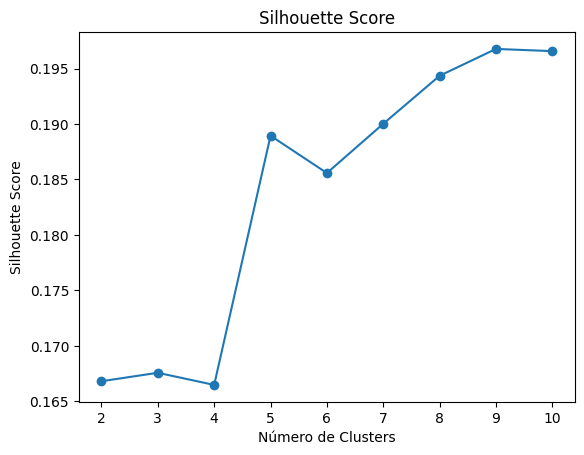

Centroides de los Clusters:
Cluster 0:
	A: -1.1208685444433983
	B: 0.5889676136815551
	Cluster: 0.04041979515523784


IndexError: index 3 is out of bounds for axis 0 with size 3

In [12]:
silhouette_plot(df_escala)

def kmeans_analysis(data, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300)
    kmeans.fit(data)
    centroids = kmeans.cluster_centers_

    inertia = kmeans.inertia_
    silhouette = silhouette_score(data, kmeans.labels_)
    db_index = davies_bouldin_score(data, kmeans.labels_)
    mtp.figure(figsize=(8, 6))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=kmeans.labels_, palette='Set2', s=100, alpha=0.7)
    mtp.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroides')
    mtp.title(f'Clusters con k={k} y Centroides')
    mtp.xlabel('Variable 1')
    mtp.ylabel('Variable 2')
    mtp.legend()
    mtp.show()
    print(f"Reporte para k={k}:")
    print(f"Inertia: {inertia}")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {db_index}")

    return inertia, silhouette, db_index

def analyze_centroids(centroids, original_columns):
    print("Centroides de los Clusters:")
    for i, centroid in enumerate(centroids):
        print(f"Cluster {i}:")
        for j, val in enumerate(centroid):
            print(f"\t{original_columns[j]}: {val}")
        print("\n")

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300)
kmeans.fit(df_escala)
analyze_centroids(kmeans.cluster_centers_, df.columns)

centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)
print("Centroides en la escala original:")
print(centroids_original)